In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns

In [294]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [295]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [4]:
# train=train.sample(frac=0.20,ignore_index=True)
# test=test.sample(frac=0.20,ignore_index=True)

In [5]:
# print(train.shape)
# print(test.shape)

In [296]:
sample_submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [297]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [147]:
train.columns.difference(test.columns)

Index(['Purchase'], dtype='object')

In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None
<class 'p

#### --> From the above info we see that there are null values in Product_Category_2 ,Product_Category_3

In [298]:
train['source']="train"
test['source']="test"

In [332]:
data=pd.concat([train,test],ignore_index=True)


In [333]:
data.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train


In [17]:
#Find the unique values in USER ID & Product ID

print(data['User_ID'].nunique())
print(data['Product_ID'].nunique())

5891
3677


In [18]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [19]:
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

##### Missing Value Analysis

In [20]:
feature_na=[features for features in data.columns if data[features].isna().sum()>0 and features!='Purchase']

for feature in feature_na:
    mean_nan=np.round(data[feature].isna().mean()*100,3)
    print(f"{feature} has {mean_nan}% null values")
    
    if mean_nan >70:
        print(f"{feature} <-- has more than 70% null values")
    

Product_Category_2 has 31.389% null values
Product_Category_3 has 69.648% null values


In [63]:
df_1=data.copy()

In [64]:
df_1['Product_ID']=df_1['Product_ID'].apply(lambda x:x.replace('P',""))
df_1['Product_ID']=df_1['Product_ID'].apply(lambda x:x[0:3])
df_1['Product_ID'].value_counts()

001    265607
002    201616
000    188958
003    114165
009     13321
Name: Product_ID, dtype: int64

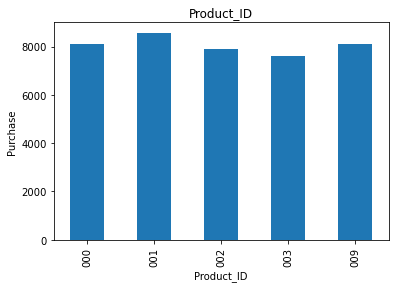

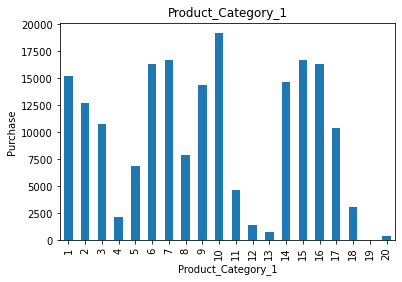

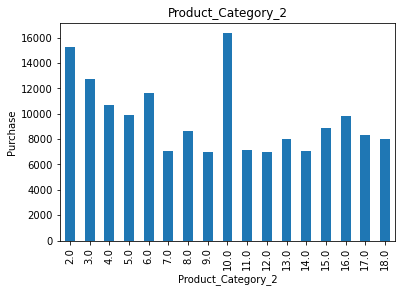

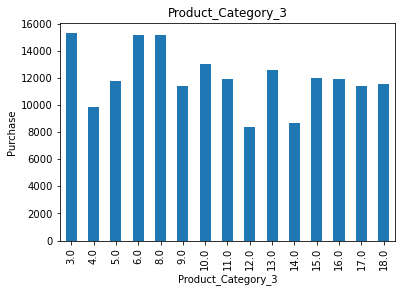

In [65]:
for feature in ['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']:  
    
    df_1.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Purchase")
    plt.title(feature)
    plt.show()

In [22]:
data['Product_Category_1'].value_counts().index

Int64Index([5, 1, 8, 11, 2, 6, 3, 4, 16, 15, 13, 10, 12, 7, 18, 20, 14, 19, 17,
            9],
           dtype='int64')

In [66]:
df_1['Product_Category_1']=df_1['Product_Category_1'].apply(lambda x:0 if x<10 else(2 if x>10 else 1))

In [23]:
data['Product_Category_2'].value_counts().index

Float64Index([ 8.0, 14.0,  2.0, 16.0, 15.0,  5.0,  4.0,  6.0, 11.0, 17.0, 13.0,
               9.0, 12.0, 10.0,  3.0, 18.0,  7.0],
             dtype='float64')

In [67]:
df_1['Product_Category_2']=df_1['Product_Category_2'].apply(lambda x:0 if x<10 else(2 if x>10 else 1))

In [24]:
data['Product_Category_3'].value_counts().index

Float64Index([16.0, 15.0, 14.0, 17.0,  5.0,  8.0,  9.0, 12.0, 13.0,  6.0, 18.0,
               4.0, 11.0, 10.0,  3.0],
             dtype='float64')

In [73]:
df_1['Product_Category_3']=df_1['Product_Category_3'].apply(lambda x:0 if (x<12) else 1)

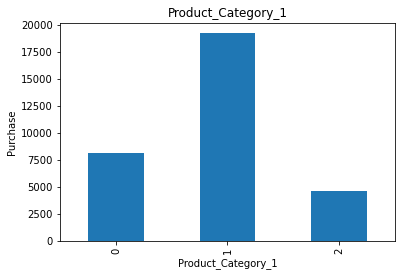

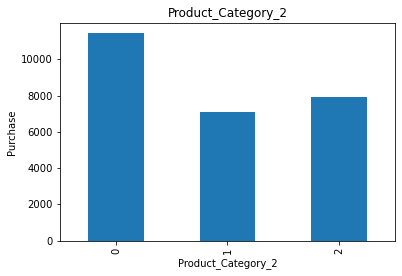

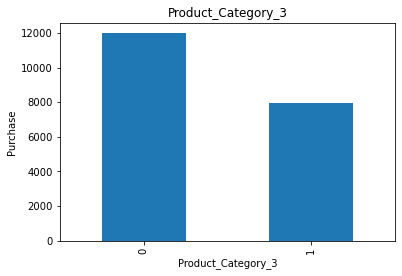

In [74]:
for feature in ['Product_Category_1','Product_Category_2','Product_Category_3']:  
    
    df_1.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Purchase")
    plt.title(feature)
    plt.show()

In [25]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

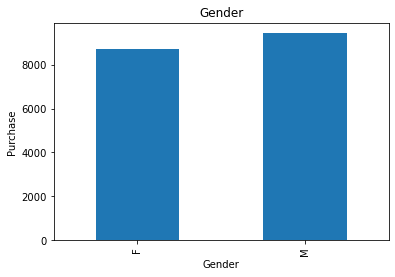

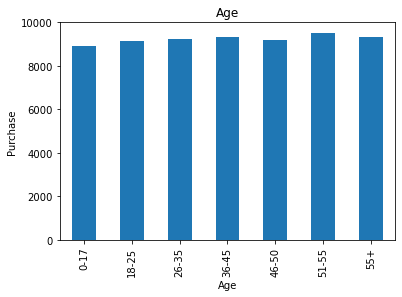

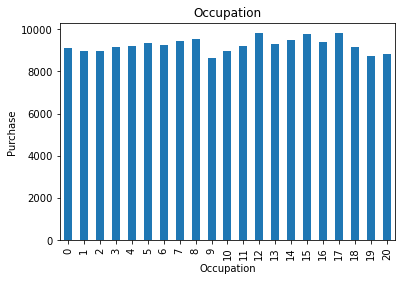

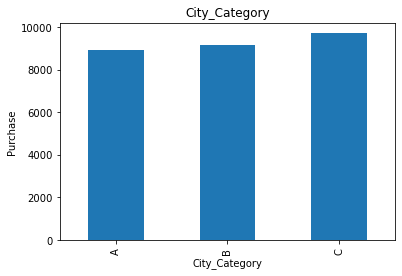

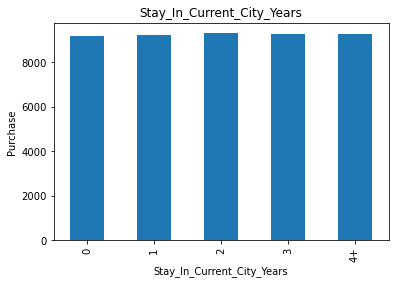

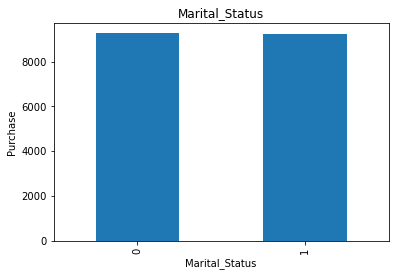

In [26]:

for feature in ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    data.groupby(feature)['Purchase'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Purchase")
    plt.title(feature)
    plt.show()

In [27]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


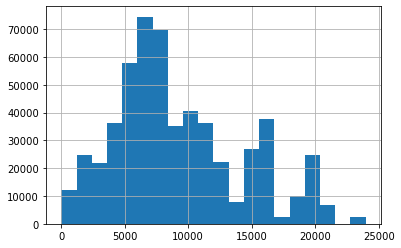

In [28]:
data['Purchase'].hist(bins=20)
plt.show()

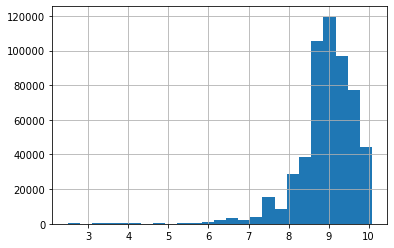

In [29]:
log_purchase=np.log(data['Purchase'])
log_purchase.hist(bins=25)
plt.show()

In [ ]:
#Log of target is not needed

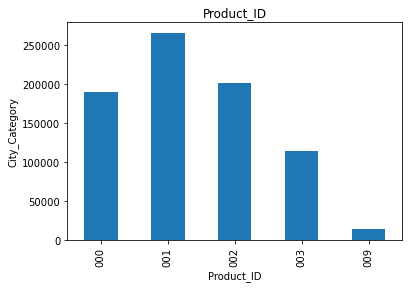

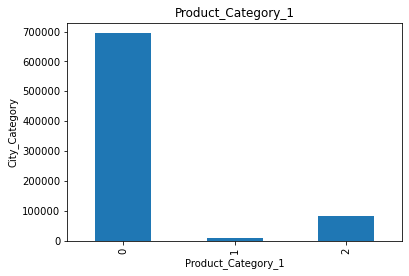

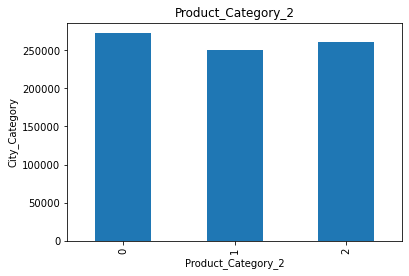

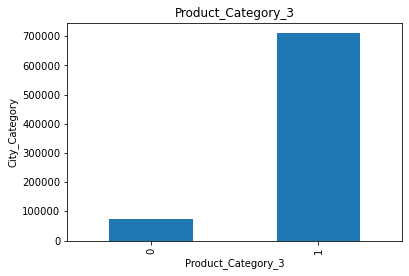

In [75]:
for feature in ['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']:
    df_1.groupby(feature)['City_Category'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("City_Category")
    plt.title(feature)
    plt.show()

##### Data PreProcessing and Feature Eng..

In [334]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [335]:
data['Age']=data['Age'].apply(lambda x:x.replace('+',""))

In [336]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].apply(lambda x:x.replace('+',""))

In [337]:
data['Product_ID']=data['Product_ID'].apply(lambda x:x.replace('P',""))

In [338]:
data['Product_ID'].apply(lambda x:x[0:3]).value_counts()


001    265607
002    201616
000    188958
003    114165
009     13321
Name: Product_ID, dtype: int64

In [339]:
data['Product_ID']=data['Product_ID'].apply(lambda x:x[0:3])

In [340]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,000,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,002,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,000,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,000,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,002,M,55,16,C,4,0,8,NaN,NaN,7969.0,train


In [341]:
data['Age']=data['Age'].map({'26-35':2,'36-45':3,'18-25':1,'46-50':4,'51-55':5,'55':6,'0-17':0})

In [342]:
print(data['Occupation'].value_counts())
print(data['Stay_In_Current_City_Years'].value_counts())

4     103086
0      98850
7      84127
1      67687
17     57418
       ...  
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, Length: 21, dtype: int64
1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64


In [343]:

data['Product_Category_2']=data.groupby(['Gender','Age','Occupation'])['Product_Category_2'].apply(lambda x:x.fillna(x.median()))

In [344]:
data['Product_Category_3']=data.groupby(['Gender','Age'])['Product_Category_3']\
.apply(lambda x:x.fillna(x.median()))

In [345]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,000,F,0,10,A,2,0,3,8.0,12.0,8370.0,train
1,1000001,002,F,0,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,000,F,0,10,A,2,0,12,8.0,12.0,1422.0,train
3,1000001,000,F,0,10,A,2,0,12,14.0,12.0,1057.0,train
4,1000002,002,M,6,16,C,4,0,8,12.0,15.0,7969.0,train


In [346]:
data.isna().sum()

User_ID                    0
Product_ID                 0
Gender                     0
Age                        0
Occupation                 0
                       ...  
Product_Category_1         0
Product_Category_2         0
Product_Category_3         0
Purchase              233599
source                     0
Length: 13, dtype: int64

<AxesSubplot:>

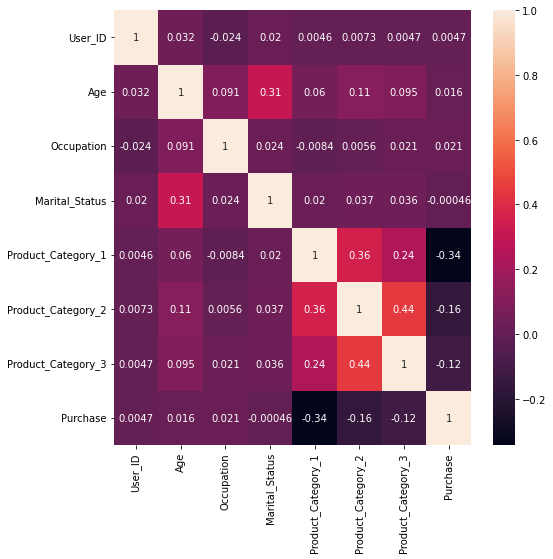

In [313]:
plt.subplots(figsize=(8,8))
corr_ = data.corr()
sns.heatmap(corr_,annot = True)

In [347]:
data.drop("User_ID",inplace=True,axis=1)

In [348]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,000,F,0,10,A,2,0,3,8.0,12.0,8370.0,train
1,002,F,0,10,A,2,0,1,6.0,14.0,15200.0,train
2,000,F,0,10,A,2,0,12,8.0,12.0,1422.0,train
3,000,F,0,10,A,2,0,12,14.0,12.0,1057.0,train
4,002,M,6,16,C,4,0,8,12.0,15.0,7969.0,train


In [349]:
data['Product_Category_2']=data['Product_Category_2'].apply(lambda x:0 if x<10 else(2 if x>10 else 1))

In [350]:
data['Product_Category_2'].value_counts()

0    426352
2    331914
1     25401
Name: Product_Category_2, dtype: int64

In [351]:
data['Product_Category_1']=data['Product_Category_1'].apply(lambda x:0 if x<10 else(2 if x>10 else 1))

In [352]:
data['Product_Category_1'].value_counts()

0    693821
2     82473
1      7373
Name: Product_Category_1, dtype: int64

In [355]:
data['Product_Category_3']=data['Product_Category_3'].apply(lambda x:0 if x<11 else 1)

In [356]:
data['Product_Category_3'].value_counts()

1    712517
0     71150
Name: Product_Category_3, dtype: int64

In [357]:
data.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,000,F,0,10,A,2,0,0,0,1,8370.0,train
1,002,F,0,10,A,2,0,0,0,1,15200.0,train
2,000,F,0,10,A,2,0,2,0,1,1422.0,train
3,000,F,0,10,A,2,0,2,2,1,1057.0,train
4,002,M,6,16,C,4,0,0,2,1,7969.0,train
5,001,M,2,15,A,3,0,0,0,1,15227.0,train
6,001,M,4,7,B,2,1,0,0,1,19215.0,train
7,003,M,4,7,B,2,1,0,2,1,15854.0,train
8,009,M,4,7,B,2,1,0,2,1,15686.0,train
9,002,M,2,20,A,1,1,0,0,1,7871.0,train


<AxesSubplot:>

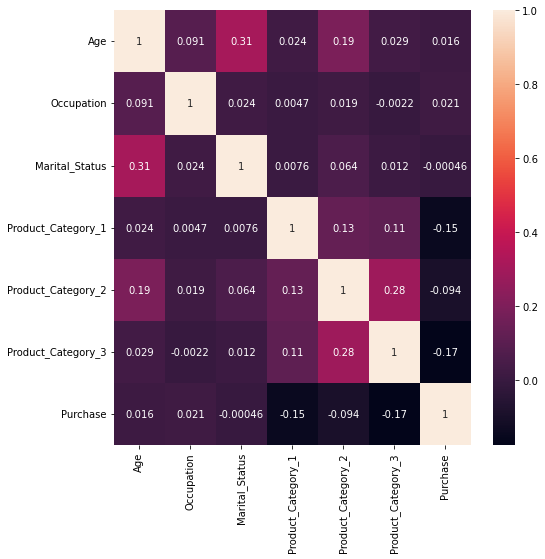

In [358]:
plt.subplots(figsize=(8,8))
corr_ = data.corr()
sns.heatmap(corr_,annot = True)

In [359]:
X_vif=data.drop(['Product_ID','Purchase','source','Gender','City_Category','Stay_In_Current_City_Years','Age'],axis=1)
vif=pd.DataFrame()
vif['Features']=X_vif.columns
vif

,Features
0,Occupation
1,Marital_Status
2,Product_Category_1
3,Product_Category_2
4,Product_Category_3


In [360]:
X_vif.values

array([[10,  0,  0,  0,  1],
       [10,  0,  0,  0,  1],
       [10,  0,  2,  0,  1],
       ...,
       [15,  1,  0,  0,  1],
       [ 1,  0,  1,  2,  1],
       [ 0,  1,  0,  0,  1]])

In [361]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [362]:
vif['Vif']=[variance_inflation_factor(X_vif.values,i) for i in range(len(X_vif.columns))]
vif

,Features,Vif
0,Occupation,2.245925
1,Marital_Status,1.625366
2,Product_Category_1,1.153080
3,Product_Category_2,1.999940
4,Product_Category_3,3.597656


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Product_Category_3          783667 non-null  int64  
 10  Purchase                    550068 non-null  float64
 11  source                      783667 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 71.7+ MB


In [363]:
data_dum=pd.get_dummies(data.drop('source',axis=1),drop_first=True)

In [365]:
data_dum

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_001,Product_ID_002,Product_ID_003,Product_ID_009,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,10,0,0,0,1,8370.0,0,0,0,0,0,0,0,0,1,0,0
1,0,10,0,0,0,1,15200.0,0,1,0,0,0,0,0,0,1,0,0
2,0,10,0,2,0,1,1422.0,0,0,0,0,0,0,0,0,1,0,0
3,0,10,0,2,2,1,1057.0,0,0,0,0,0,0,0,0,1,0,0
4,6,16,0,0,2,1,7969.0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,2,15,1,0,0,1,NaN,1,0,0,0,0,1,0,0,0,0,1
783663,2,15,1,0,0,1,NaN,0,1,0,0,0,1,0,0,0,0,1
783664,2,15,1,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,1
783665,4,1,0,1,2,1,NaN,1,0,0,0,0,0,1,0,0,0,1


In [366]:
train_df = data_dum.loc[data_dum['Purchase'].isna()==False]
test_df = data_dum.loc[data_dum['Purchase'].isna()==True]

In [367]:
train_df.reset_index(drop=True,inplace=True)

In [368]:
test_df.reset_index(drop=True,inplace=True)

In [369]:
train_df.head(3)

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_001,Product_ID_002,Product_ID_003,Product_ID_009,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,10,0,0,0,1,8370.0,0,0,0,0,0,0,0,0,1,0,0
1,0,10,0,0,0,1,15200.0,0,1,0,0,0,0,0,0,1,0,0
2,0,10,0,2,0,1,1422.0,0,0,0,0,0,0,0,0,1,0,0


In [370]:
test_df.head(3)

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_001,Product_ID_002,Product_ID_003,Product_ID_009,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,4,7,1,0,2,1,NaN,1,0,0,0,1,1,0,0,1,0,0
1,2,17,0,0,0,1,NaN,1,0,0,0,1,0,1,0,0,0,0
2,3,1,1,0,2,1,NaN,0,1,0,0,0,1,0,0,0,0,1


In [371]:
test_without_y=test_df.drop('Purchase',axis=1)

In [372]:
train_df['Purchase'].isna().sum()

0

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
x=train_df.drop('Purchase',axis=1)
y=train_df['Purchase']

In [375]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2,random_state=2)

In [376]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(440054, 17)
(110014, 17)
(440054,)
(110014,)


In [380]:
# Modelling without scaling (As all of features are discrete)

In [377]:
lr1 = LinearRegression()
lr1.fit(train_x,train_y)

LinearRegression()

In [378]:
pred_test = lr1.predict(test_x)
pred_test = abs(pred_test)

In [379]:
print("MAE: ",mean_absolute_error(test_y,pred_test))
print("MSE: ",mean_squared_error(test_y,pred_test))
print("RMSE: ",np.sqrt(mean_squared_error(test_y,pred_test)))
print("R-Squared: ",r2_score(test_y,pred_test))

MAE:  3871.8913258222883
MSE:  23825417.54250755
RMSE:  4881.128716035621
R-Squared:  0.06150777600790236


In [381]:
# Modelling after scaling

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
sc = StandardScaler()
train_x_scaled = sc.fit_transform(train_x)
test_x_scaled = sc.transform(test_x)
test_final_scaled = sc.transform(test_without_y)

In [282]:
lr = LinearRegression()
lr.fit(train_x_scaled,train_y)

LinearRegression()

In [264]:
pred_test = lr.predict(test_x_scaled)
pred_test = abs(pred_test)

In [273]:
pred_train= lr.predict(train_x_scaled)

In [274]:
# Performance metrics for train
print("MAE: ",mean_absolute_error(train_y,pred_train))
print("MSE: ",mean_squared_error(train_y,pred_train))
print("RMSE: ",np.sqrt(mean_squared_error(train_y,pred_train)))
print("R-Squared: ",r2_score(train_y,pred_train))

MAE:  3850.8184785816434
MSE:  23600454.14939487
RMSE:  4858.029862958324
R-Squared:  0.06318365783516422


In [265]:
# Performance metrics for test
print("MAE: ",mean_absolute_error(test_y,pred_test))
print("MSE: ",mean_squared_error(test_y,pred_test))
print("RMSE: ",np.sqrt(mean_squared_error(test_y,pred_test)))
print("R-Squared: ",r2_score(test_y,pred_test))

MAE:  3873.7793242562325
MSE:  23847516.97756192
RMSE:  4883.391954119792
R-Squared:  0.06063727088805959


In [267]:
pred_test_final = lr.predict(test_final_scaled)
pred_test_final = abs(pred_test_final)

In [270]:
sample_submission['Purchase'] = pred_test_final
sample_submission.to_csv("./submission_BlackFriday.csv",index = False)